In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle

In [2]:
df = pd.read_csv("heart_disease.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


## Data Exploration

In [6]:
stats = df.describe(include = 'all')
stats

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,912.000000,913.000000,918.000000,918,913.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.389254,198.455641,0.233115,NaN,136.821468,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.539684,109.535845,0.423046,NaN,25.440546,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.000000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,222.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Categorical Variables : Sex, ChestPainType , FastingBS , RestingECG , ExerciseAngina , ST_Slope, HeartDisease.

## Categorical Var

In [8]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [9]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [10]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [11]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [12]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [13]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [14]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Data Visualization

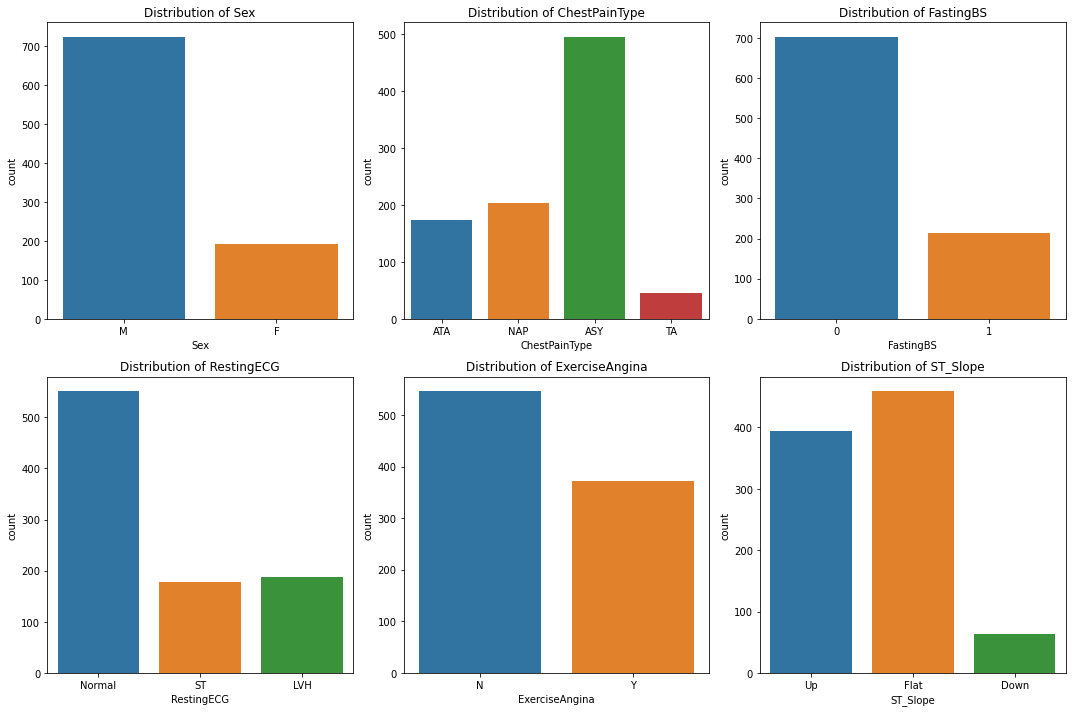

In [15]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot Sex distribution
sns.countplot(x='Sex', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sex')

# Plot ChestPainType distribution
sns.countplot(x='ChestPainType', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of ChestPainType')

# Plot FastingBS distribution
sns.countplot(x='FastingBS', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of FastingBS')

# Plot RestingECG distribution
sns.countplot(x='RestingECG', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of RestingECG')

# Plot ExerciseAngina distribution
sns.countplot(x='ExerciseAngina', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of ExerciseAngina')

# Plot ST_Slope distribution
sns.countplot(x='ST_Slope', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of ST_Slope')



# Adjust layout
plt.tight_layout()
plt.show()

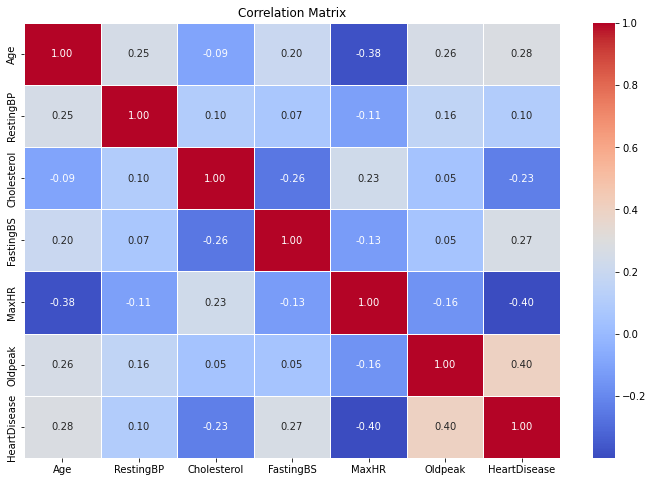

In [16]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
# the correlation matrix
correlation_matrix = df[numerical_columns].corr()
# heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [67]:
# Positive means directly proportional 
# Negative means indirectly proportional

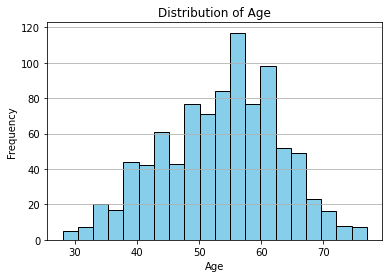

In [17]:
age_data = df['Age']
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

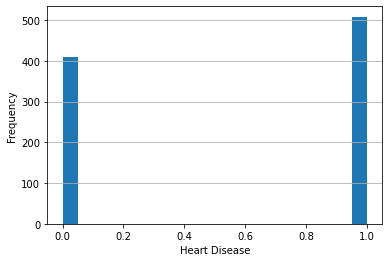

In [18]:
plt.hist(df['HeartDisease'] , bins = 20 )
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.grid(axis = 'y')
plt.show()

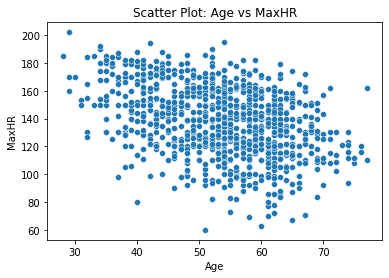

In [19]:
# Example scatter plot for Age vs MaxHR
sns.scatterplot(x='Age', y='MaxHR', data=df)
plt.title('Scatter Plot: Age vs MaxHR')
plt.show()


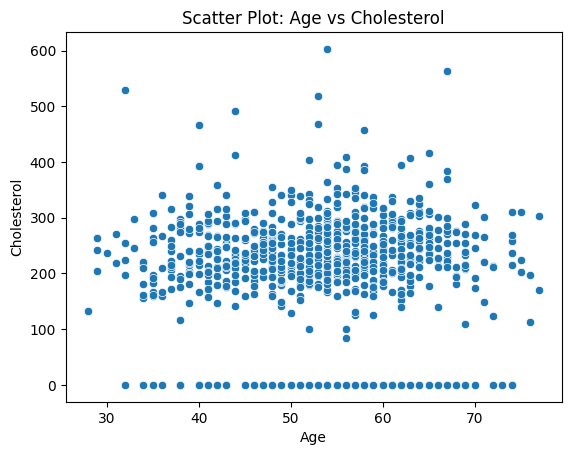

In [72]:
sns.scatterplot(x='Age', y='Cholesterol', data=df)
plt.title('Scatter Plot: Age vs Cholesterol')
plt.show()

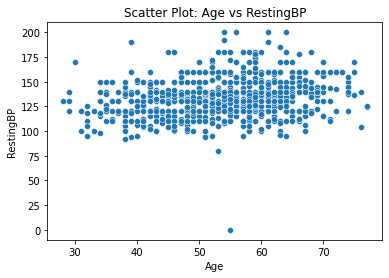

In [20]:
sns.scatterplot(x='Age', y='RestingBP', data=df)
plt.title('Scatter Plot: Age vs RestingBP')
plt.show()

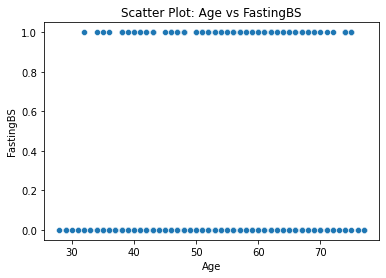

In [21]:
sns.scatterplot(x='Age', y='FastingBS', data=df)
plt.title('Scatter Plot: Age vs FastingBS')
plt.show()

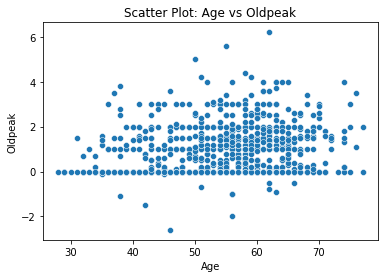

In [22]:
sns.scatterplot(x='Age', y='Oldpeak', data=df)
plt.title('Scatter Plot: Age vs Oldpeak')
plt.show()

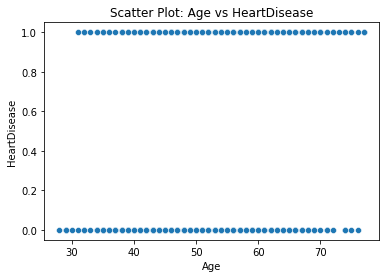

In [23]:
sns.scatterplot(x='Age', y='HeartDisease', data=df)
plt.title('Scatter Plot: Age vs HeartDisease')
plt.show()

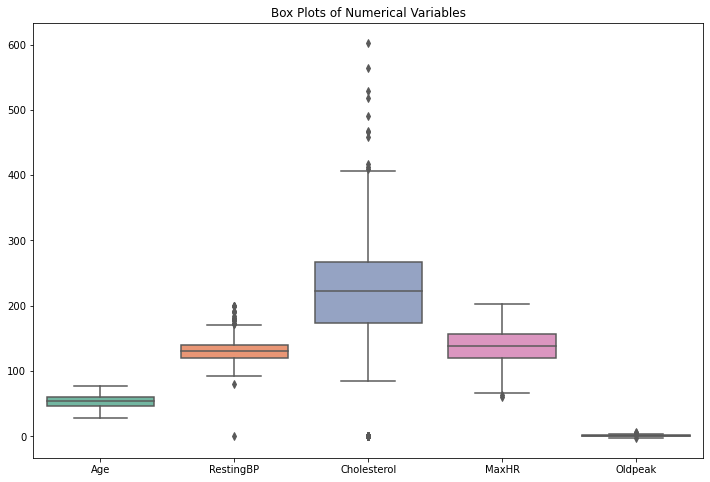

In [24]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols], orient='v', palette='Set2')
plt.title('Box Plots of Numerical Variables')
plt.show()

In [25]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         6
Cholesterol       5
FastingBS         0
RestingECG        0
MaxHR             5
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [26]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


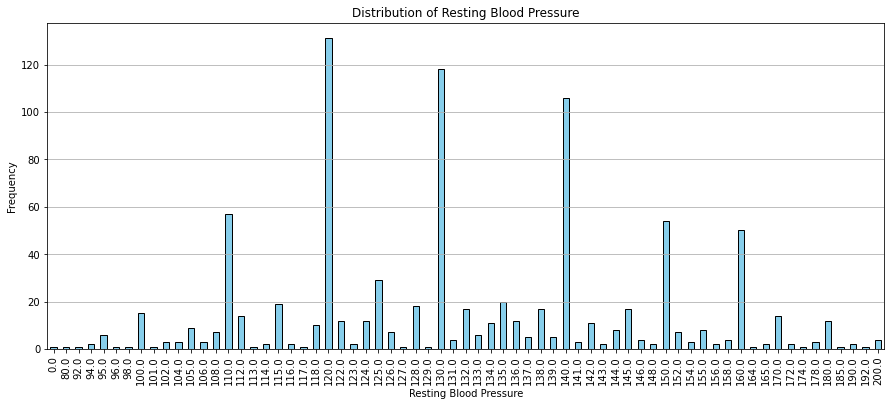

In [27]:
resting_bp_data = df['RestingBP']

# Plot the distribution using a bar plot
plt.figure(figsize=(15, 6))
resting_bp_data.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

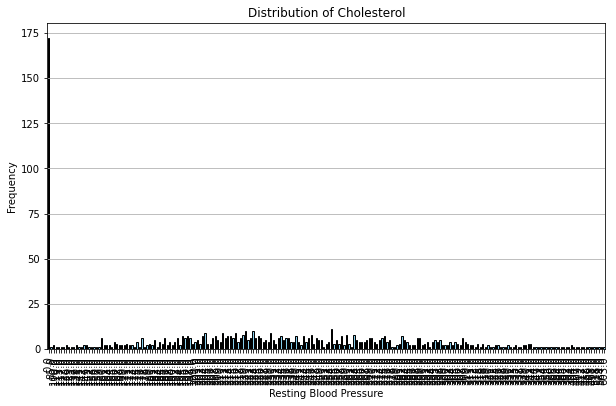

In [28]:
resting_bp_data = df['Cholesterol']

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
resting_bp_data.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Cholesterol')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

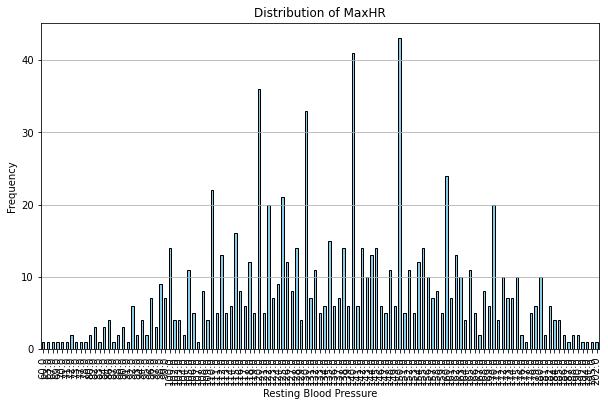

In [29]:
resting_bp_data = df['MaxHR']

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
resting_bp_data.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of MaxHR')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

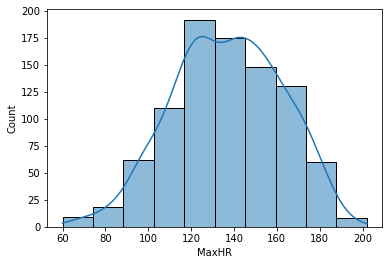

In [30]:
sns.histplot(df['MaxHR'] , bins=10 , kde=True)

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

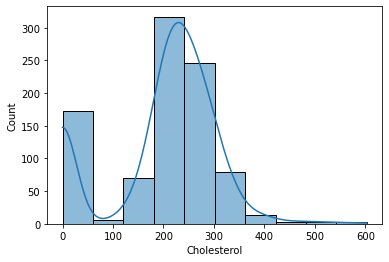

In [31]:
sns.histplot(df['Cholesterol'], bins=10,kde=True)

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

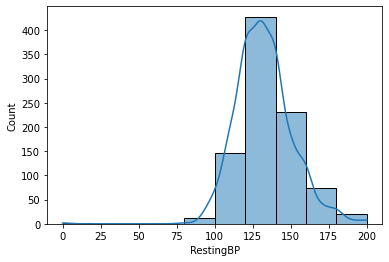

In [32]:
sns.histplot(df['RestingBP'], bins=10 , kde=True)

## Data Cleaning

In [33]:
df['RestingBP'].fillna(120, inplace=True)

In [34]:
df['MaxHR'].fillna(220-df['Age'] , inplace=True)

In [35]:
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

In [36]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [37]:
df.head(13)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120.0,339.0,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130.0,237.0,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110.0,208.0,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140.0,207.0,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120.0,284.0,0,Normal,120.0,N,0.0,Up,0


In [63]:
import pandas as pd
from scipy import stats
z_scores = stats.zscore(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
threshold = 3
outlier_indices = (abs(z_scores) > threshold).any(axis=1)
columns_with_outliers = df.loc[outlier_indices, ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
columns_with_outliers
count = columns_with_outliers.shape[0]
print(count)


19


In [45]:
filtered_df.describe(include = 'all')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.308279,198.583878,0.233115,NaN,136.994553,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.505909,109.250570,0.423046,NaN,25.485364,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,222.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,266.750000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
df.describe(include = 'all')

In [39]:
# Work on df_no_outliers

## Feature-Target Relationship Visualization

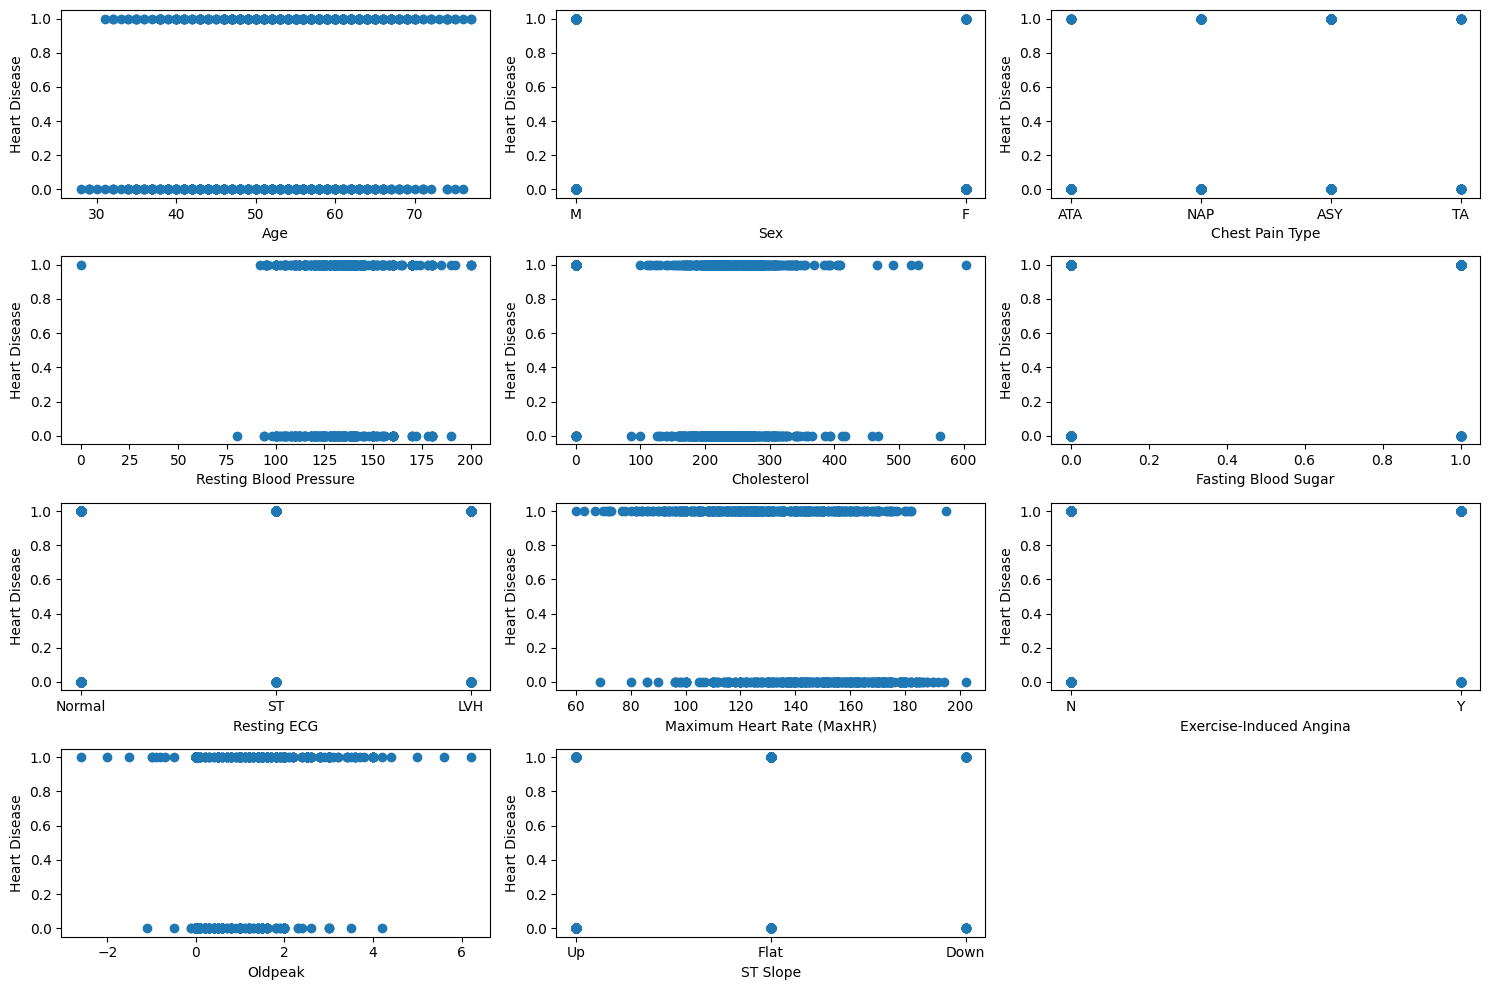

In [94]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Scatter plot for Age
axes[0, 0].scatter(df['Age'], df['HeartDisease'])
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Heart Disease')

# Scatter plot for Sex
axes[0, 1].scatter(df['Sex'], df['HeartDisease'])
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Heart Disease')

# Scatter plot for ChestPainType
axes[0, 2].scatter(df['ChestPainType'], df['HeartDisease'])
axes[0, 2].set_xlabel('Chest Pain Type')
axes[0, 2].set_ylabel('Heart Disease')


# Scatter plot for RestingBP
axes[1, 0].scatter(df['RestingBP'], df['HeartDisease'])
axes[1, 0].set_xlabel('Resting Blood Pressure')
axes[1, 0].set_ylabel('Heart Disease')

# Scatter plot for Cholesterol
axes[1, 1].scatter(df['Cholesterol'], df['HeartDisease'])
axes[1, 1].set_xlabel('Cholesterol')
axes[1, 1].set_ylabel('Heart Disease')

# Scatter plot for FastingBS
axes[1, 2].scatter(df['FastingBS'], df['HeartDisease'])
axes[1, 2].set_xlabel('Fasting Blood Sugar')
axes[1, 2].set_ylabel('Heart Disease')

# Scatter plot for RestingECG
axes[2, 0].scatter(df['RestingECG'], df['HeartDisease'])
axes[2, 0].set_xlabel('Resting ECG')
axes[2, 0].set_ylabel('Heart Disease')

# Scatter plot for MaxHR
axes[2, 1].scatter(df['MaxHR'], df['HeartDisease'])
axes[2, 1].set_xlabel('Maximum Heart Rate (MaxHR)')
axes[2, 1].set_ylabel('Heart Disease')

# Scatter plot for ExerciseAngina
axes[2, 2].scatter(df['ExerciseAngina'], df['HeartDisease'])
axes[2, 2].set_xlabel('Exercise-Induced Angina')
axes[2, 2].set_ylabel('Heart Disease')

# Scatter plot for Oldpeak
axes[3, 0].scatter(df['Oldpeak'], df['HeartDisease'])
axes[3, 0].set_xlabel('Oldpeak')
axes[3, 0].set_ylabel('Heart Disease')

# Scatter plot for ST_Slope
axes[3, 1].scatter(df['ST_Slope'], df['HeartDisease'])
axes[3, 1].set_xlabel('ST Slope')
axes[3, 1].set_ylabel('Heart Disease')

# Hide the empty subplot in the last row and last column
axes[3, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## Data Pre-processing

In [95]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoder = LabelEncoder()
for var in categorical_variables:
    df[var] = label_encoder.fit_transform(df[var])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172.0,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156.0,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98.0,0,0.0,2,0
3,48,0,0,138.0,214.0,0,1,108.0,1,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122.0,0,0.0,2,0


In [96]:
df.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG          int32
MaxHR             float64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [98]:
print(X_train_scaled)

[[-1.24506731  0.54060477  1.31674291 ... -0.83846064 -0.09706109
  -2.25746543]
 [-1.8862362   0.54060477  1.31674291 ... -0.83846064 -0.83628643
   1.07985506]
 [ 0.25099346  0.54060477 -0.80974619 ...  1.19266183  0.08774524
  -0.58880518]
 ...
 [ 0.67843939  0.54060477 -0.80974619 ...  1.19266183  0.45735791
   1.07985506]
 [ 0.67843939  0.54060477 -0.80974619 ...  1.19266183 -0.83628643
   1.07985506]
 [-1.45879027 -1.84978019 -0.80974619 ... -0.83846064  1.01177691
  -0.58880518]]


## Model Implementation and Comparison

Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
lc= LogisticRegression(random_state=42)
lc.fit(X_train_scaled, y_train)
y_pred_lr = lc.predict(X_test_scaled)


In [104]:
# Save a model
pickle.dump(lc,open('lr.pkl' , 'wb'))
model = pickle.load(open('lr.pkl' , 'rb'))

Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled , y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [107]:
# Save a model
pickle.dump(dt,open('dt.pkl' , 'wb'))
model = pickle.load(open('dt.pkl' , 'rb'))

Support Vector Machine (SVM)

In [108]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [109]:
# Save a model
pickle.dump(svm,open('svm.pkl' , 'wb'))
model = pickle.load(open('svm.pkl' , 'rb'))

K-Nearest Neighbors (KNN)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)

In [111]:
# Save a model
pickle.dump(knn_classifier,open('knn.pkl' , 'wb'))
model = pickle.load(open('knn.pkl' , 'rb'))

Evaluate model performance

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")


Logistic Regression Accuracy: 0.8478
Confusion Matrix:
[[68  9]
 [19 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


Decision Tree Accuracy: 0.7772
Confusion Matrix:
[[64 13]
 [28 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.74      0.79       107

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184


Support Vector Machine (SVM) Accuracy: 0.8641
Confusion Matrix:
[[66 11]
 [14 93]]
Classification Report:
              precision    recall  f1-score   sup